In [104]:
# ws03
import numpy as np

from sklearn.datasets import fetch_20newsgroups

categories = ['alt.atheism', 'soc.religion.christian','comp.graphics', 'sci.med']

news = fetch_20newsgroups(subset='train',
    categories=categories, shuffle=True)
news = fetch_20newsgroups(subset='train', categories=categories)


In [105]:
news.keys()

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])

In [106]:
print(news.DESCR)

.. _20newsgroups_dataset:

The 20 newsgroups text dataset
------------------------------

The 20 newsgroups dataset comprises around 18000 newsgroups posts on
20 topics split in two subsets: one for training (or development)
and the other one for testing (or for performance evaluation). The split
between the train and test set is based upon a messages posted before
and after a specific date.

This module contains two loaders. The first one,
:func:`sklearn.datasets.fetch_20newsgroups`,
returns a list of the raw texts that can be fed to text feature
extractors such as :class:`~sklearn.feature_extraction.text.CountVectorizer`
with custom parameters so as to extract feature vectors.
The second one, :func:`sklearn.datasets.fetch_20newsgroups_vectorized`,
returns ready-to-use features, i.e., it is not necessary to use a feature
extractor.

**Data Set Characteristics:**

=================   ==========
Classes                     20
Samples total            18846
Dimensionality               1

In [107]:
len(news.target_names)

4

In [108]:
len(news.data)

2257

In [109]:
len(news.target)

2257

In [110]:
news.target_names

['alt.atheism', 'comp.graphics', 'sci.med', 'soc.religion.christian']

In [111]:
news.target[:10]

array([1, 1, 3, 3, 3, 3, 3, 2, 2, 2], dtype=int64)

In [112]:
for k in news.target[:10]:
    print(news.target_names[k])

comp.graphics
comp.graphics
soc.religion.christian
soc.religion.christian
soc.religion.christian
soc.religion.christian
soc.religion.christian
sci.med
sci.med
sci.med


In [113]:
news.filenames[:10]

array(['C:\\Users\\ASUS\\scikit_learn_data\\20news_home\\20news-bydate-train\\comp.graphics\\38440',
       'C:\\Users\\ASUS\\scikit_learn_data\\20news_home\\20news-bydate-train\\comp.graphics\\38479',
       'C:\\Users\\ASUS\\scikit_learn_data\\20news_home\\20news-bydate-train\\soc.religion.christian\\20737',
       'C:\\Users\\ASUS\\scikit_learn_data\\20news_home\\20news-bydate-train\\soc.religion.christian\\20942',
       'C:\\Users\\ASUS\\scikit_learn_data\\20news_home\\20news-bydate-train\\soc.religion.christian\\20487',
       'C:\\Users\\ASUS\\scikit_learn_data\\20news_home\\20news-bydate-train\\soc.religion.christian\\20891',
       'C:\\Users\\ASUS\\scikit_learn_data\\20news_home\\20news-bydate-train\\soc.religion.christian\\20914',
       'C:\\Users\\ASUS\\scikit_learn_data\\20news_home\\20news-bydate-train\\sci.med\\58110',
       'C:\\Users\\ASUS\\scikit_learn_data\\20news_home\\20news-bydate-train\\sci.med\\58114',
       'C:\\Users\\ASUS\\scikit_learn_data\\20news_home\\2

# Histogram

In [114]:
np.unique(news.target)

array([0, 1, 2, 3], dtype=int64)

In [115]:
labels, counts = np.unique(news.target, return_counts=True)

labels_str = np.array(news.target_names)[labels]

list(zip(labels_str, counts))

[('alt.atheism', 480),
 ('comp.graphics', 584),
 ('sci.med', 594),
 ('soc.religion.christian', 599)]

In [116]:
import pandas as pd
df = pd.DataFrame(list(zip(labels_str, counts)))
df

,0,1
0,alt.atheism,480
1,comp.graphics,584
2,sci.med,594
3,soc.religion.christian,599


<Axes: ylabel='count'>

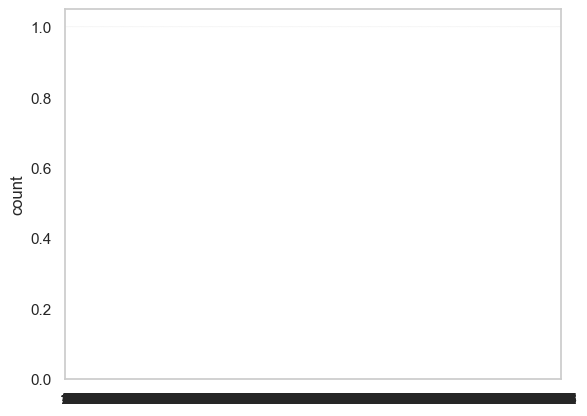

In [117]:
%matplotlib inline
import seaborn as sns
sns.countplot(news.target)

<Axes: xlabel='0', ylabel='1'>

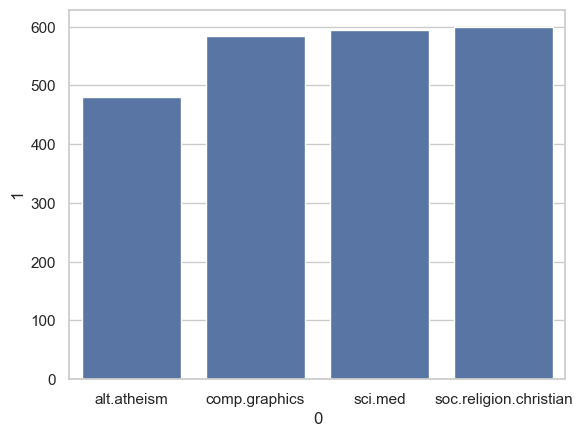

In [118]:
sns.barplot(x=df[0],y=df[1])

In [119]:
# ws04

import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

text = news.data
cv = CountVectorizer()
cv = CountVectorizer(stop_words='english')
count_matrix = cv.fit_transform(text)

word_matrix = count_matrix.toarray()  #
# word_matrix = count_matrix.todense()  # 
df = pd.DataFrame(word_matrix, 
                  columns=cv.get_feature_names_out())

df.head()

,00,000,0000,0000001200,000005102000,0001,000100255pixel,00014,000406,0007,...,zvi,zvonko,zwart,zyeh,zyklon,zyxel,zz,zzz,ªl,íålittin
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [120]:
df.shape

(2257, 35482)

In [121]:
df[df.columns[10000:10010]].head()

,covered,covering,coverings,covers,coversion,covert,covingc,covington,covlin,covlir
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0


In [122]:
dfsum = df.sum(axis=0, skipna=True)
bow = dfsum.sort_values(ascending=False)[:30]
bow 

edu             4675
subject         2464
lines           2353
god             2216
organization    2192
com             2172
writes          1645
people          1604
article         1453
don             1400
know            1230
think           1213
like            1177
university      1170
does            1151
just            1130
time             959
posting          892
say              840
jesus            825
good             805
believe          803
use              772
host             739
cs               729
nntp             710
way              686
new              676
world            650
graphics         613
dtype: int64

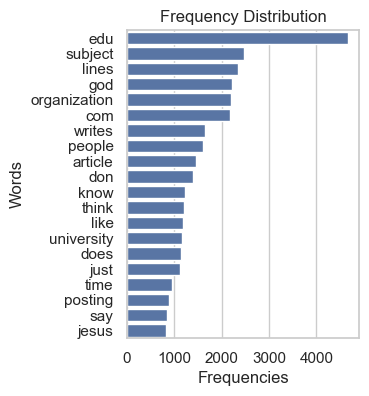

In [123]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")
plt.subplots(figsize=(3, 4))
sns.barplot(x=bow.values[:20], y=bow.index[:20])

plt.ylabel('Words')
plt.xlabel('Frequencies')
plt.title('Frequency Distribution')
plt.show()

## ws05

In [124]:
print(news.data[0])

From: sd345@city.ac.uk (Michael Collier)
Subject: Converting images to HP LaserJet III?
Nntp-Posting-Host: hampton
Organization: The City University
Lines: 14

Does anyone know of a good way (standard PC application/PD utility) to
convert tif/img/tga files into LaserJet III format.  We would also like to
do the same, converting to HPGL (HP plotter) files.

Please email any response.

Is this the correct group?

Thanks in advance.  Michael.
-- 
Michael Collier (Programmer)                 The Computer Unit,
Email: M.P.Collier@uk.ac.city                The City University,
Tel: 071 477-8000 x3769                      London,
Fax: 071 477-8565                            EC1V 0HB.



In [125]:
news.target[:10] 
news.target[0] 

1

In [126]:
news.target_names[(news.target[0])]

'comp.graphics'

In [127]:
for k in news.target[:10]:
    print(news.target_names[k])

comp.graphics
comp.graphics
soc.religion.christian
soc.religion.christian
soc.religion.christian
soc.religion.christian
soc.religion.christian
sci.med
sci.med
sci.med


## ws06

In [128]:
# Train Test Split
X = news.data
y = news.target

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

In [129]:
len(X_train),len(X_test)

(1692, 565)

In [130]:
import time
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer

start = time.time()

tvec = TfidfVectorizer()
X_train_tfidf = tvec.fit_transform(X_train)
X_test_tfidf = tvec.transform(X_test)

model = MultinomialNB(alpha=0.005)
model.fit(X_train_tfidf, y_train)

end = time.time()

print("Accuracy: {:.3f} , Time: {:.3f} ".
      format(model.score(X_test_tfidf, y_test), (end - start)))

Accuracy: 0.975 , Time: 0.632 


In [131]:
X_train_tfidf.shape

(1692, 31780)

## ws07

In [132]:
# Predict
new_docs = ['OpenGL on the GPU is fast.']
#new_docs = ['ask about health care topic.']
#ew_docs = ['God is love. loves you every body.']

new_docs_cv = tvec.transform(new_docs)
y_pred = model.predict(new_docs_cv)

news.target_names[y_pred[0]]

'comp.graphics'

In [133]:
# Predict
new_docs = ['God is love. loves you every body.',
           'OpenGL on the GPU is fast.',
           'ask about health care topic.']

new_docs_cv = tvec.transform(new_docs)

y_pred = model.predict(new_docs_cv)
y_pred

for k in y_pred:
    print(news.target_names[k]) 

soc.religion.christian
comp.graphics
sci.med


## ws08 Pipeline

In [134]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

import time
start = time.time()

pipe1 = Pipeline([('vectorizer', TfidfVectorizer()),   # 975
                  ('classifier', MultinomialNB(alpha=0.005))])

pipe1.fit(X_train, y_train)
end = time.time()

print("Accuracy: {:.3f} , Time: {:.3f} ".
      format(pipe1.score(X_test, y_test), (end - start)))

Accuracy: 0.975 , Time: 0.473 


In [135]:
# 
new_docs = ['God is love. loves you every body.',
           'OpenGL on the GPU is fast.',
           'ask about health care topic.']

y_pred = pipe1.predict(new_docs)
y_pred

for k in y_pred:
    print(news.target_names[k]) 
    

soc.religion.christian
comp.graphics
sci.med


In [136]:
new_doc = 'I would like to know a quick way\
to convert .ps files into LaserJet III format.  \
the same, converting to HPGL (HP plotter) files. \
Please email any response.'

y_pred = pipe1.predict([new_doc])

news.target_names[y_pred[0]]

'comp.graphics'

## ws09

In [137]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics

y_pred = pipe1.predict(X_test)
labels = news.target_names

print(metrics.classification_report(y_test, y_pred, target_names=labels))

cm = confusion_matrix(y_test, y_pred)
print(cm)

                        precision    recall  f1-score   support

           alt.atheism       0.99      0.95      0.97       131
         comp.graphics       0.96      1.00      0.98       160
               sci.med       0.99      0.96      0.98       132
soc.religion.christian       0.96      0.98      0.97       142

              accuracy                           0.98       565
             macro avg       0.98      0.97      0.97       565
          weighted avg       0.98      0.98      0.98       565

[[125   0   0   6]
 [  0 160   0   0]
 [  0   5 127   0]
 [  1   1   1 139]]


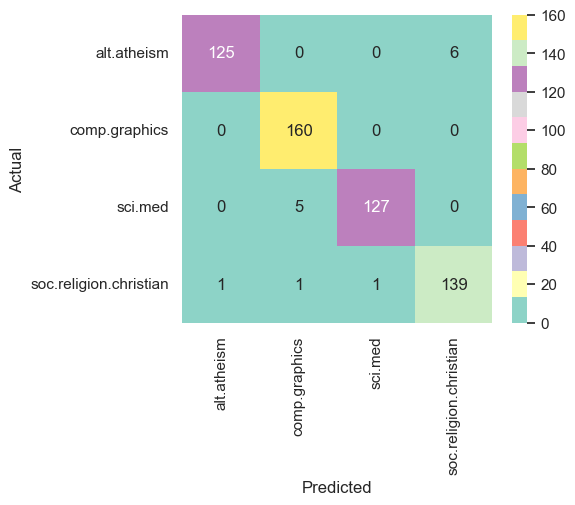

In [138]:
from sklearn.metrics import confusion_matrix # Confusion Matrix
import matplotlib.pyplot as plt
y_pred = pipe1.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
labels=news.target_names
fig, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(cm, annot=True, cmap='Set3', fmt ='d', 
    xticklabels=labels, yticklabels=labels)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()